# DistilBERT Sentiment Analysis Project

Notebook ini berisi implementasi lengkap model DistilBERT untuk klasifikasi sentimen. DistilBERT merupakan versi yang lebih kecil dan lebih cepat dari BERT, namun tetap mempertahankan 97% performa BERT.

Implementasi ini mencakup:
- Persiapan dan instalasi dependensi
- Pemrosesan data
- Pembuatan kelas dataset kustom
- Konfigurasi model DistilBERT
- Fungsi pelatihan dan evaluasi
- Pipeline pelatihan model
- Penyimpanan dan pemuatan model
- Inferensi dan prediksi

## Daftar Isi
- [1. Instalasi dan Import Library](#1-instalasi-dan-import-library)
- [2. Mengecek Environment](#2-mengecek-environment)
- [3. Mempersiapkan Data](#3-mempersiapkan-data)
   - [3.1. Enron Dataset](#31-enron-dataset)
   - [3.2. SMS Dataset](#32-sms-dataset)
   - [3.3. Telegram Dataset](#33-telegram-dataset)
   - [3.4. Merge Datasets](#34-merge-datasets)
   - [3.5. Split Data](#35-split-data)
   - [3.6. Visualize Data Distributions](#36-visualize-data-distributions)
- [4. Membuat Kelas Dataset Kustom](#4-membuat-kelas-dataset-kustom)
- [5. Fungsi Pelatihan dan Evaluasi](#5-fungsi-pelatihan-dan-evaluasi)
- [6. Mempersiapkan dan Melatih Model DistilBERT](#6-mempersiapkan-dan-melatih-model-distilbert)
- [7. Menyimpan dan Memuat Model](#7-menyimpan-dan-memuat-model)
- [8. Inferensi dan Prediksi](#8-inferensi-dan-prediksi)
- [9. Kesimpulan](#9-kesimpulan)
- [10. Latihan Tambahan (Opsional)](#10-latihan-tambahan-opsional)

In [ ]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define source and destination paths
source_folder = '/content/drive/MyDrive/data'
os.makedirs('data', exist_ok=True)
destination_folder = '/content/data'  # Path in Colab where you want to copy the data

# Create destination if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the folder structure and files
if os.path.exists(source_folder):
    # Copy entire folder structure
    shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)
    print(f"✅ Folder structure copied from {source_folder} to {destination_folder}")
else:
    print(f"❌ Source folder {source_folder} not found")

Mounted at /content/drive
✅ Folder structure copied from /content/drive/MyDrive/data to /content/data


## 1. Instalasi dan Import Library

Mari kita mulai dengan menginstal library yang diperlukan dan mengimpor dependensi yang dibutuhkan.

In [ ]:
# Menginstal library yang diperlukan
!pip install torch transformers pandas numpy scikit-learn tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
# Import library yang diperlukan
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time
import datetime
from tqdm import tqdm

## 2. Mengecek Environment

Sebelum memulai, mari kita periksa versi library yang digunakan dan ketersediaan GPU untuk pelatihan.

In [ ]:
# Cek versi library
print(f"PyTorch version: {torch.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

# Cek ketersediaan GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

PyTorch version: 2.6.0+cu124
Pandas version: 2.2.2
Numpy version: 2.0.2
Using device: cuda
GPU name: NVIDIA L4
GPU memory: 23.80 GB


## 3. Mempersiapkan Data

Implementasi ini menggunakan dataset dari tiga sumber berbeda untuk deteksi spam. Kita akan memproses dataset dari Enron, SMS, dan Telegram, kemudian menggabungkannya untuk pelatihan model.

Pertama, mari kita buat direktori yang diperlukan untuk dataset dan visualisasi.

In [ ]:
# Buat direktori jika belum ada
os.makedirs('data', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Set seed untuk reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# Fungsi visualisasi distribusi dataset
def visualize_distribution(df, title, save_path=None):
    count_spam = len(df[df['label'] == 'spam'])
    count_ham = len(df[df['label'] == 'ham'])

    plt.figure(figsize=(8, 6))
    plt.bar(['Ham', 'Spam'], [count_ham, count_spam], color=['skyblue', 'salmon'])
    plt.title(title)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.3)

    # Add count labels on top of bars
    for i, count in enumerate([count_ham, count_spam]):
        plt.text(i, count + 10, str(count), ha='center')

    # Add percentage labels inside bars
    total = count_ham + count_spam
    plt.text(0, count_ham/2, f'{count_ham/total:.1%}', ha='center', color='black', fontweight='bold')
    plt.text(1, count_spam/2, f'{count_spam/total:.1%}', ha='center', color='black', fontweight='bold')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

### 3.1. Enron Dataset

Mari kita proses dataset email Enron:

In [ ]:
# Process Enron dataset
def preprocess_enron():
    print("Processing Enron dataset...")
    # Read the CSV file
    df = pd.read_csv('data/enron/enron_spam_data.csv')

    # Filter the desired columns
    df_filtered = df[['Spam/Ham', 'Message']]

    # Rename the column headers
    df_filtered.rename(columns={'Spam/Ham': 'label', 'Message': 'text'}, inplace=True)

    # Drop rows with empty message values
    df_filtered.dropna(subset=['text'], inplace=True)

    # Convert cells to a single line
    df_filtered['text'] = df_filtered['text'].apply(lambda x: x.replace('\n', ' ').strip() if isinstance(x, str) else x)

    print(f"Enron dataset processed: {len(df_filtered)} samples")
    return df_filtered

# Process Enron dataset
enron_df = preprocess_enron()
enron_df.head()

Processing Enron dataset...


<ipython-input-7-6d34d397d37c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'Spam/Ham': 'label', 'Message': 'text'}, inplace=True)
<ipython-input-7-6d34d397d37c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['text'], inplace=True)
<ipython-input-7-6d34d397d37c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil

Enron dataset processed: 33345 samples


,label,text
1,ham,"gary , production from the high island larger ..."
2,ham,- calpine daily gas nomination 1 . doc
3,ham,fyi - see note below - already done . stella -...
4,ham,fyi . - - - - - - - - - - - - - - - - - - - - ...
5,ham,"jackie , since the inlet to 3 river plant is s..."


### 3.2. SMS Dataset

Mari kita proses dataset SMS spam:

In [ ]:
# Process SMS dataset
def preprocess_sms():
    print("Processing SMS dataset...")
    # Read the CSV file
    df = pd.read_csv('data/sms/sms_spam.csv')

    # Ensure we have the correct columns
    if 'v1' in df.columns and 'v2' in df.columns:
        # Common format for SMS spam dataset
        df_filtered = df[['v1', 'v2']]
        df_filtered.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
    elif 'type' in df.columns and 'text' in df.columns:
        # Alternative format
        df_filtered = df[['type', 'text']]
        df_filtered.rename(columns={'type': 'label'}, inplace=True)
    else:
        # Assume the first column is label and second is text
        df_filtered = df.iloc[:, 0:2]
        df_filtered.columns = ['label', 'text']

    # Standardize label format
    df_filtered['label'] = df_filtered['label'].apply(lambda x: 'spam' if x.lower() in ['spam', '1'] else 'ham')

    # Drop rows with empty message values
    df_filtered.dropna(subset=['text'], inplace=True)

    # Convert cells to a single line
    df_filtered['text'] = df_filtered['text'].apply(lambda x: x.replace('\n', ' ').strip() if isinstance(x, str) else x)

    print(f"SMS dataset processed: {len(df_filtered)} samples")
    return df_filtered

# Process SMS dataset
try:
    sms_df = preprocess_sms()
    sms_df.head()
except Exception as e:
    print(f"Error processing SMS dataset: {e}")
    sms_df = pd.DataFrame(columns=['label', 'text'])

Processing SMS dataset...
SMS dataset processed: 5572 samples


### 3.3. Telegram Dataset

Mari kita proses dataset spam Telegram:

In [ ]:
# Process Telegram dataset
def preprocess_telegram():
    print("Processing Telegram dataset...")
    # Read the CSV file
    df = pd.read_csv('data/telegram/telegram_spam_dataset.csv')

    # Filter and rename columns if needed
    if 'label' in df.columns and 'text' in df.columns:
        df_filtered = df[['label', 'text']]
    else:
        # Assume the first column is label and second is text
        df_filtered = df.iloc[:, 0:2]
        df_filtered.columns = ['label', 'text']

    # Drop rows with empty message values
    df_filtered.dropna(subset=['text'], inplace=True)

    # Convert cells to a single line
    df_filtered['text'] = df_filtered['text'].apply(lambda x: x.replace('\n', ' ').strip() if isinstance(x, str) else x)

    print(f"Telegram dataset processed: {len(df_filtered)} samples")
    return df_filtered

# Process Telegram dataset
try:
    telegram_df = preprocess_telegram()
    telegram_df.head()
except Exception as e:
    print(f"Error processing Telegram dataset: {e}")
    telegram_df = pd.DataFrame(columns=['label', 'text'])

Processing Telegram dataset...
Telegram dataset processed: 20324 samples


### 3.4. Merge Datasets

Mari kita gabungkan ketiga dataset menjadi satu:

In [ ]:
# Merge all datasets
def merge_datasets(dfs):
    print("Merging datasets...")
    # Menggabungkan semua dataframe
    merged_df = pd.concat(dfs, ignore_index=True)

    # Menghapus duplikat
    merged_df.drop_duplicates(subset=['text'], inplace=True)

    # Balance dataset (opsional)
    # Untuk sekarang, kita akan menyimpan semua data

    print(f"Total merged dataset size: {len(merged_df)} samples")
    print(f"Spam samples: {len(merged_df[merged_df['label'] == 'spam'])}")
    print(f"Ham samples: {len(merged_df[merged_df['label'] == 'ham'])}")

    return merged_df

# Menggabungkan dataset
merged_df = merge_datasets([enron_df, sms_df, telegram_df])
merged_df.head()

Merging datasets...
Total merged dataset size: 54839 samples
Spam samples: 20548
Ham samples: 34291


,label,text
0,ham,"gary , production from the high island larger ..."
1,ham,- calpine daily gas nomination 1 . doc
2,ham,fyi - see note below - already done . stella -...
3,ham,fyi . - - - - - - - - - - - - - - - - - - - - ...
4,ham,"jackie , since the inlet to 3 river plant is s..."


### 3.5. Split Data

Mari kita bagi dataset gabungan menjadi set pelatihan, validasi, dan pengujian:

In [ ]:
# Split data into train, validation, and test sets
def split_data(df, train_size=0.8, val_size=0.1, test_size=0.1):
    print("Splitting data into train, validation, and test sets...")

    # First split: separate test set
    train_val_df, test_df = train_test_split(
        df,
        test_size=test_size,
        random_state=SEED,
        stratify=df['label']
    )

    # Second split: separate train and validation sets
    train_df, val_df = train_test_split(
        train_val_df,
        test_size=val_size / (train_size + val_size),
        random_state=SEED,
        stratify=train_val_df['label']
    )

    print(f"Train set size: {len(train_df)}")
    print(f"Validation set size: {len(val_df)}")
    print(f"Test set size: {len(test_df)}")

    # Save to CSV files
    train_df.to_csv('data/spam_message_train.csv', index=False)
    val_df.to_csv('data/spam_message_val.csv', index=False)
    test_df.to_csv('data/spam_message_test.csv', index=False)

    return train_df, val_df, test_df

# Membagi dataset gabungan
train_df, val_df, test_df = split_data(merged_df)

Splitting data into train, validation, and test sets...
Train set size: 43871
Validation set size: 5484
Test set size: 5484


### 3.6. Visualize Data Distributions

Mari kita visualisasikan distribusi data:

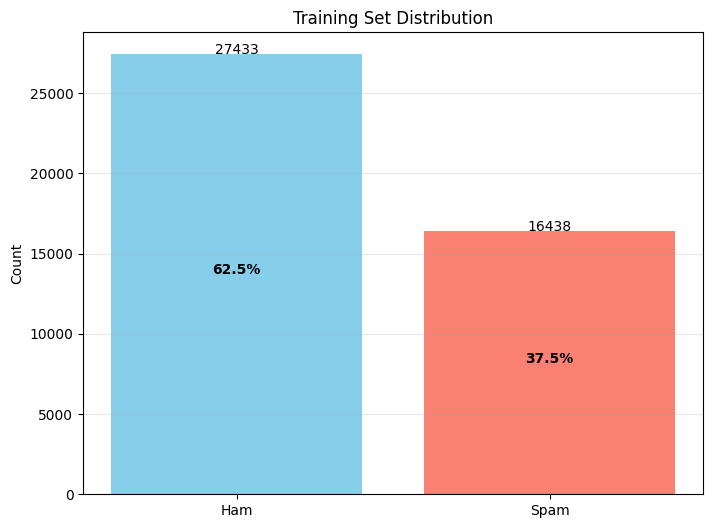

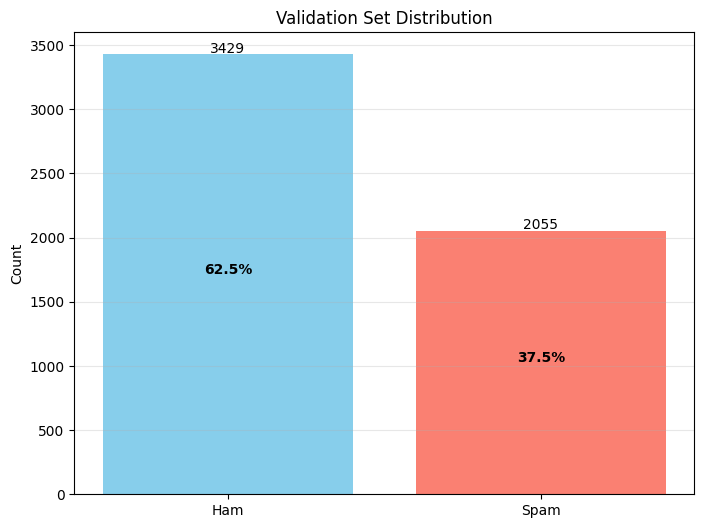

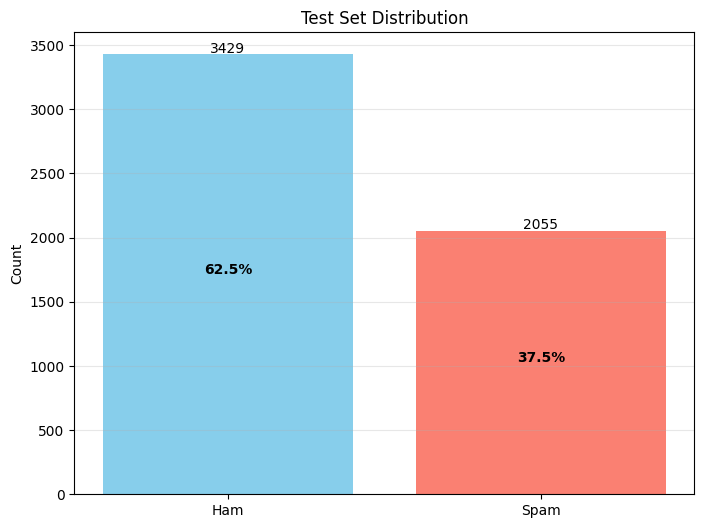

Rata-rata panjang teks: 896.72
Panjang teks minimum: 1
Panjang teks maksimum: 178837


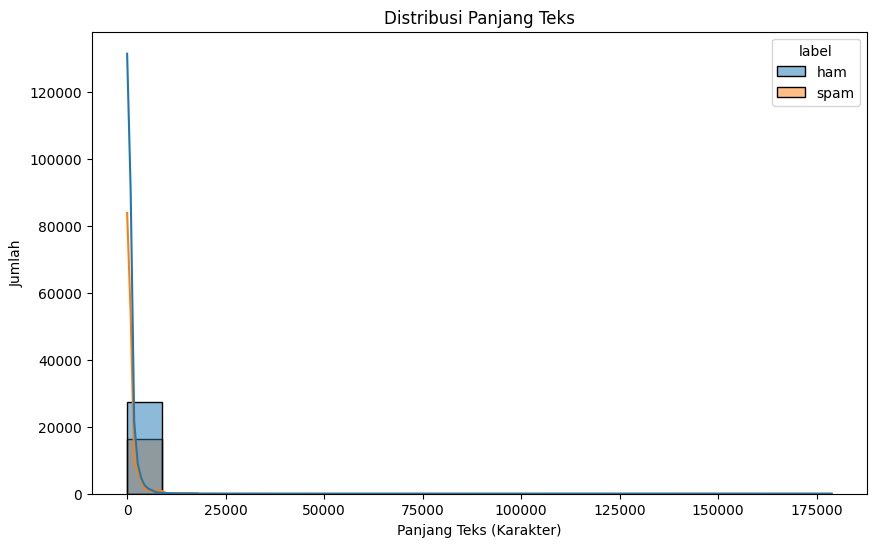

In [ ]:
# Visualisasi distribusi dataset
visualize_distribution(train_df, 'Training Set Distribution', 'plots/train_set_distribution.jpg')
visualize_distribution(val_df, 'Validation Set Distribution', 'plots/val_set_distribution.jpg')
visualize_distribution(test_df, 'Test Set Distribution', 'plots/test_set_distribution.jpg')

# Menghitung statistik panjang teks
train_df['text_length'] = train_df['text'].apply(len)
print(f"Rata-rata panjang teks: {train_df['text_length'].mean():.2f}")
print(f"Panjang teks minimum: {train_df['text_length'].min()}")
print(f"Panjang teks maksimum: {train_df['text_length'].max()}")

plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='text_length', hue='label', bins=20, kde=True)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks (Karakter)')
plt.ylabel('Jumlah')
plt.savefig('plots/text_length_distribution.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 4. Membuat Kelas Dataset Kustom

Kita perlu membuat kelas dataset khusus yang dapat memproses teks dan tokenisasi.

In [ ]:
# Mendefinisikan kelas dataset kustom untuk deteksi spam
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        # Konversi label string ('spam'/'ham') ke numerik (1/0) jika belum berbentuk numerik
        if isinstance(labels[0], str):
            self.labels = [1 if label == 'spam' else 0 for label in labels]
        else:
            self.labels = labels

        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

## 5. Fungsi Pelatihan dan Evaluasi

Sekarang, mari kita definisikan fungsi-fungsi yang diperlukan untuk melatih dan mengevaluasi model DistilBERT.

In [ ]:
# Fungsi untuk menghitung metrik evaluasi
def compute_metrics(y_true, y_pred, positive_label="spam", negative_label="ham"):
    """
    Menghitung metrik evaluasi untuk klasifikasi biner.

    Parameters:
        y_true (array-like): Label sebenarnya.
        y_pred (array-like): Label prediksi.
        positive_label (optional): Nilai yang merepresentasikan label positif. Default adalah "spam".
        negative_label (optional): Nilai yang merepresentasikan label negatif. Default adalah "ham".

    Returns:
        accuracy (float): Metrik akurasi.
        precision (float): Metrik presisi.
        recall (float): Metrik recall.
        f1 (float): Metrik F1-score.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Menghitung akurasi
    accuracy = np.mean(y_true == y_pred)

    # Menghitung true positives, false positives, dan false negatives
    tp = np.sum((y_true == positive_label) & (y_pred == positive_label))  # True positive
    fp = np.sum((y_true == negative_label) & (y_pred == positive_label))  # False positive
    fn = np.sum((y_true == positive_label) & (y_pred == negative_label))  # False negative

    # Menghitung precision, recall, dan F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

# Fungsi untuk membuat confusion matrix
def confusion_matrix(y_true, y_pred):
    """
    Menghitung confusion matrix berdasarkan label sebenarnya dan label prediksi.

    Parameters:
        y_true (list): Label sebenarnya.
        y_pred (list): Label prediksi.

    Returns:
        list of lists: Confusion matrix.
    """
    # Memperoleh kelas unik dari y_true dan y_pred
    classes = list(set(y_true) | set(y_pred))
    classes.sort()

    # Menghitung jumlah total kelas unik
    num_classes = len(classes)

    # Inisialisasi confusion matrix sebagai list 2D berisi nol
    cm = [[0] * num_classes for _ in range(num_classes)]

    # Iterasi untuk setiap pasangan label sebenarnya dan prediksi
    for true, pred in zip(y_true, y_pred):
        # Temukan indeks kelas sebenarnya dan prediksi dalam daftar kelas
        true_idx = classes.index(true)
        pred_idx = classes.index(pred)

        # Tingkatkan sel yang sesuai dalam confusion matrix
        cm[true_idx][pred_idx] += 1

    # Kembalikan confusion matrix
    return cm

# Fungsi untuk membuat heatmap dari confusion matrix
def plot_heatmap(cm, saveToFile=None, annot=True, fmt="d", cmap="Blues", xticklabels=None, yticklabels=None):
    """
    Membuat heatmap dari confusion matrix.

    Parameters:
        cm (list of lists): Confusion matrix.
        saveToFile (str): Jalur file untuk menyimpan gambar. Default adalah None.
        annot (bool): Apakah akan menambahkan anotasi nilai sel. Default adalah True.
        fmt (str): Format untuk anotasi nilai sel. Default adalah "d" (integer).
        cmap (str): Colormap untuk heatmap. Default adalah "Blues".
        xticklabels (list): Label untuk sumbu x. Default adalah None.
        yticklabels (list): Label untuk sumbu y. Default adalah None.
    """
    # Konversi confusion matrix ke array NumPy
    cm = np.array(cm)

    # Buat gambar dan sumbu untuk heatmap
    fig, ax = plt.subplots(figsize=(8, 6))

    # Buat heatmap
    im = ax.imshow(cm, cmap=cmap)

    # Tampilkan nilai sel sebagai anotasi
    if annot:
        # Normalize colormap untuk mendapatkan nilai antara 0 dan 1
        norm = Normalize(vmin=cm.min(), vmax=cm.max())
        for i in range(len(cm)):
            for j in range(len(cm[i])):
                value = cm[i, j]
                # Tentukan warna teks berdasarkan nilai sel
                text_color = 'white' if norm(value) > 0.5 else 'black'
                ax.text(j, i, format(value, fmt), ha="center", va="center", color=text_color)

    # Atur tick dan label sumbu x dan y
    if xticklabels:
        ax.set_xticks(np.arange(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
    if yticklabels:
        ax.set_yticks(np.arange(len(yticklabels)))
        ax.set_yticklabels(yticklabels)

    # Atur label dan judul
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix Heatmap")

    # Tambahkan colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Simpan gambar jika path file disediakan
    if saveToFile is not None:
        plt.savefig(saveToFile, dpi=300, bbox_inches='tight')

    plt.show()

# Fungsi untuk format waktu
def format_time(elapsed):
    elapsed_rounded = int(round(elapsed))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# Fungsi untuk melatih model
def train(model, dataloader, optimizer, scheduler, device):
    model.train()
    train_loss = 0.0

    # Membuat progress bar untuk iterasi batch
    progress_bar = tqdm(dataloader, desc="Training", leave=True)

    for batch in progress_bar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        # Update progress bar
        progress_bar.set_postfix({'Training Loss': train_loss / (progress_bar.n + 1)})

    train_loss /= len(dataloader)
    return train_loss

# Fungsi untuk mengevaluasi model
def evaluate(model, dataloader, device):
    model.eval()
    predictions = []
    actual_labels = []

    # Tambahkan progress bar untuk evaluasi
    eval_progress = tqdm(dataloader, desc="Evaluating", leave=False)

    with torch.no_grad():
        for batch in eval_progress:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())

            # Update progress bar dengan akurasi batch saat ini
            batch_acc = (preds == labels).float().mean().item()
            eval_progress.set_postfix({'Batch Acc': f"{batch_acc:.4f}"})

    # Hitung akurasi dan report
    accuracy = accuracy_score(actual_labels, predictions)
    report = classification_report(actual_labels, predictions)

    return accuracy, report

## 6. Mempersiapkan dan Melatih Model DistilBERT

Dalam bagian ini, kita akan memuat tokenizer dan model DistilBERT, membagi data menjadi set pelatihan dan validasi, dan melatih model.

In [ ]:
# Memuat tokenizer DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Memuat model DistilBERT untuk klasifikasi
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=2,  # klasifikasi biner (spam/ham)
    output_attentions=False,
    output_hidden_states=False
)

# Memeriksa arsitektur model
print(model)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# Menggunakan dataset yang sudah dibagi sebelumnya
train_texts = train_df['text'].values
train_labels = train_df['label'].values
val_texts = val_df['text'].values
val_labels = val_df['label'].values

print(f"Jumlah data pelatihan: {len(train_texts)}")
print(f"Jumlah data validasi: {len(val_texts)}")

# Membuat dataset
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

# Memeriksa contoh item dataset
sample_item = train_dataset[0]
print("Contoh item dataset:")
for key, value in sample_item.items():
    print(f"{key}: {value.shape}")

# Mendekode input_ids kembali ke teks
print("\nContoh teks yang ditokenisasi:")
decoded_text = tokenizer.decode(sample_item['input_ids'])
print(f"Teks asli: {train_texts[0]}")
print(f"Teks yang didekode: {decoded_text}")

Jumlah data pelatihan: 43871
Jumlah data validasi: 5484
Contoh item dataset:
input_ids: torch.Size([128])
attention_mask: torch.Size([128])
labels: torch.Size([])

Contoh teks yang ditokenisasi:
Teks asli: below are details of new plan currently being created by california state treasurer phil angelides and supported by sen . burton . the plan is in the initial stages and is not currently on any legislative fast - track . it is also not motivated by a desire to save socal from bankruptcy . the creator ' s goal is to give californians more control over their energy and electric futures as well as giving the tax / rate payers a share of the pie in return for money that has / will go to the utilities . we will continue to monitor this plan , its supporters and progress . plan z california state treasurer phil angelides and a powerful group of legislators are finally taking action and are developing a plan to solve california ' s energy crisis this summer . the group is comprised of leftis

In [ ]:
# Membuat dataloader
batch_size = 32

train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size
)

# Menyiapkan perangkat dan memindahkan model ke perangkat
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Menyiapkan optimizer dan scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 10  # Jumlah epoch untuk pelatihan
total_steps = len(train_dataloader) * epochs

# Membuat scheduler untuk learning rate
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [ ]:
# Melatih model
print(f"Memulai pelatihan pada perangkat: {device}")

# Inisialisasi daftar untuk melacak metrik
train_losses = []
val_accuracies = []

# Estimasi total waktu pelatihan
total_batches = len(train_dataloader) * epochs
print(f"Total batch yang akan diproses: {total_batches}")
print(f"Perkiraan waktu pelatihan: {format_time(0.1 * total_batches)} (estimasi kasar)")

# Buat progress bar untuk melacak epoch
epoch_progress = tqdm(range(epochs), desc="Progress Epochs", position=0, leave=True)

# Tabel untuk melacak hasil setiap epoch
print("\n" + "=" * 80)
print(f"{'Epoch':^10} | {'Train Loss':^15} | {'Val Accuracy':^15} | {'Duration':^15}")
print("=" * 80)

for epoch in epoch_progress:
    epoch_start = time.time()

    # Melatih
    train_loss = train(model, train_dataloader, optimizer, scheduler, device)
    train_losses.append(train_loss)

    # Evaluasi
    accuracy, report = evaluate(model, val_dataloader, device)
    val_accuracies.append(accuracy)

    # Hitung waktu yang dibutuhkan
    epoch_duration = format_time(time.time() - epoch_start)

    # Update tabel hasil
    print(f"{epoch+1:^10} | {train_loss:^15.4f} | {accuracy:^15.4f} | {epoch_duration:^15}")

    # Update progress bar epoch dengan informasi tambahan
    epoch_progress.set_description(f"Epoch {epoch+1}/{epochs} (Loss: {train_loss:.4f}, Acc: {accuracy:.4f})")

    # Simpan model terbaik jika ini adalah model dengan akurasi tertinggi
    if accuracy == max(val_accuracies):
        print(f"Menyimpan model terbaik dengan akurasi: {accuracy:.4f}")
        model.save_pretrained("./distilbert_model_best")
        tokenizer.save_pretrained("./distilbert_model_best")

print("\n" + "=" * 80)
print("\nPelatihan selesai!")

Memulai pelatihan pada perangkat: cuda
Total batch yang akan diproses: 13710
Perkiraan waktu pelatihan: 0:22:51 (estimasi kasar)


Progress Epochs:   0%|          | 0/10 [00:00<?, ?it/s]


  Epoch    |   Train Loss    |  Val Accuracy   |    Duration    



Training: 100%|██████████| 1371/1371 [03:43<00:00,  6.14it/s, Training Loss=0.107]

Epoch 1/10 (Loss: 0.1073, Acc: 0.9812):   0%|          | 0/10 [04:07<?, ?it/s]

    1      |     0.1073      |     0.9812      |     0:04:07    
Menyimpan model terbaik dengan akurasi: 0.9812


Training: 100%|██████████| 1371/1371 [03:49<00:00,  5.98it/s, Training Loss=0.0359]

Epoch 2/10 (Loss: 0.0359, Acc: 0.9843):  10%|█         | 1/10 [08:20<37:08, 247.64s/it]

    2      |     0.0359      |     0.9843      |     0:04:13    
Menyimpan model terbaik dengan akurasi: 0.9843


Training: 100%|██████████| 1371/1371 [03:51<00:00,  5.93it/s, Training Loss=0.0147]

Epoch 3/10 (Loss: 0.0147, Acc: 0.9872):  20%|██        | 2/10 [12:36<33:30, 251.37s/it]

    3      |     0.0147      |     0.9872      |     0:04:15    
Menyimpan model terbaik dengan akurasi: 0.9872


Training: 100%|██████████| 1371/1371 [03:51<00:00,  5.93it/s, Training Loss=0.00861]

Epoch 4/10 (Loss: 0.0086, Acc: 0.9852):  40%|████      | 4/10 [16:52<25:24, 254.07s/it]

    4      |     0.0086      |     0.9852      |     0:04:15    



Training: 100%|██████████| 1371/1371 [03:51<00:00,  5.92it/s, Training Loss=0.00428]

Epoch 5/10 (Loss: 0.0043, Acc: 0.9847):  50%|█████     | 5/10 [21:07<21:12, 254.51s/it]

    5      |     0.0043      |     0.9847      |     0:04:15    



Training: 100%|██████████| 1371/1371 [03:52<00:00,  5.91it/s, Training Loss=0.00375]

Epoch 6/10 (Loss: 0.0038, Acc: 0.9847):  60%|██████    | 6/10 [25:24<17:00, 255.16s/it]

    6      |     0.0038      |     0.9847      |     0:04:16    



Training: 100%|██████████| 1371/1371 [03:51<00:00,  5.92it/s, Training Loss=0.00151]

Epoch 7/10 (Loss: 0.0015, Acc: 0.9865):  70%|███████   | 7/10 [29:40<12:46, 255.38s/it]

    7      |     0.0015      |     0.9865      |     0:04:16    



Training: 100%|██████████| 1371/1371 [03:52<00:00,  5.90it/s, Training Loss=0.00074]

Epoch 8/10 (Loss: 0.0007, Acc: 0.9878):  70%|███████   | 7/10 [33:56<12:46, 255.38s/it]

    8      |     0.0007      |     0.9878      |     0:04:16    
Menyimpan model terbaik dengan akurasi: 0.9878


Training: 100%|██████████| 1371/1371 [03:52<00:00,  5.89it/s, Training Loss=0.000439]

Epoch 9/10 (Loss: 0.0004, Acc: 0.9869):  90%|█████████ | 9/10 [38:13<04:16, 256.16s/it]

    9      |     0.0004      |     0.9869      |     0:04:17    



Training: 100%|██████████| 1371/1371 [03:52<00:00,  5.91it/s, Training Loss=0.000172]

Epoch 10/10 (Loss: 0.0002, Acc: 0.9874): 100%|██████████| 10/10 [42:30<00:00, 255.00s/it]

    10     |     0.0002      |     0.9874      |     0:04:16    


Pelatihan selesai!


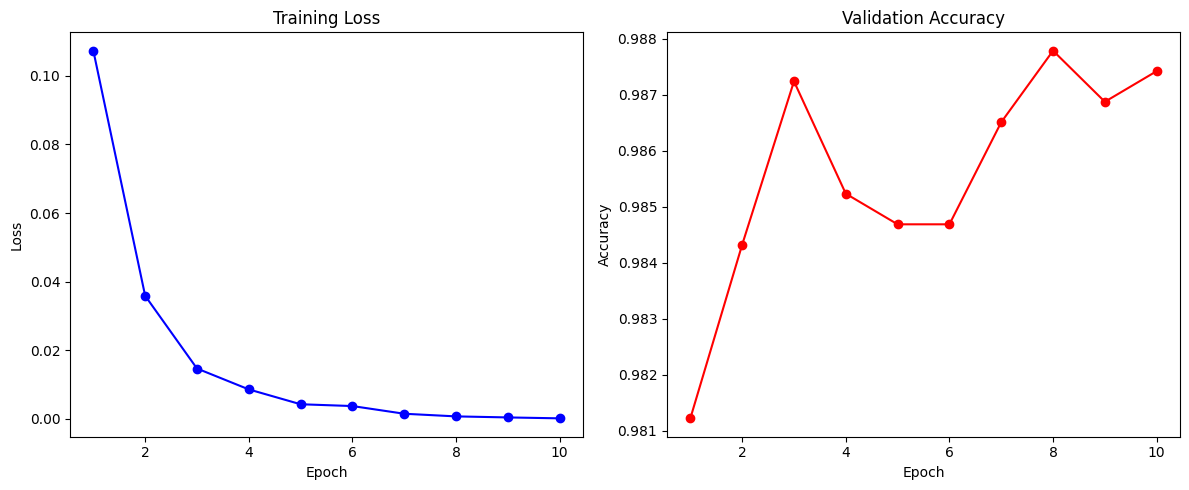

In [ ]:
# Plot metrik pelatihan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), val_accuracies, 'r-o')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

## 7. Menyimpan dan Memuat Model

Setelah pelatihan selesai, mari kita simpan model untuk digunakan nanti.

In [ ]:
# Membuat direktori untuk menyimpan model
output_dir = "./distilbert_model"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Menyimpan model dan tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model disimpan ke {output_dir}")

Model disimpan ke ./distilbert_model


In [ ]:
# Memuat model dan tokenizer yang disimpan
loaded_tokenizer = DistilBertTokenizer.from_pretrained(output_dir)
loaded_model = DistilBertForSequenceClassification.from_pretrained(output_dir)

# Memindahkan model ke perangkat yang sesuai
loaded_model.to(device)

print("Model dan tokenizer berhasil dimuat!")

Model dan tokenizer berhasil dimuat!


## 8. Inferensi dan Prediksi

Akhirnya, mari kita gunakan model yang telah dilatih untuk melakukan prediksi pada teks baru. Kita akan membuat kelas `SpamMessageDetector` untuk lebih mengorganisir proses deteksi spam.

In [ ]:
# Membuat kelas SpamMessageDetector untuk mengelola model DistilBERT untuk deteksi spam
class SpamMessageDetector:
    def __init__(self, model_path, max_length=128, seed=42):
        """
        Inisialisasi SpamMessageDetector dengan model DistilBERT.

        Parameters:
            model_path: Path ke model yang sudah dilatih atau nama model pretrained
            max_length: Panjang maksimum token untuk input teks
            seed: Seed untuk reproducibility
        """
        # Set seed untuk reproducibility
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed) if torch.cuda.is_available() else None

        self.seed = seed
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        # Load tokenizer dan model
        self.tokenizer = DistilBertTokenizer.from_pretrained(model_path)
        self.model = DistilBertForSequenceClassification.from_pretrained(model_path, num_labels=2)
        self.model = self.model.to(self.device)
        self.max_length = max_length

    def train(self, train_data_path, val_data_path=None, num_epochs=5, batch_size=32, learning_rate=2e-5):
        """
        Melatih model dengan dataset yang diberikan.

        Parameters:
            train_data_path: Path ke file CSV data pelatihan
            val_data_path: Path ke file CSV data validasi (opsional)
            num_epochs: Jumlah epoch pelatihan
            batch_size: Ukuran batch
            learning_rate: Learning rate untuk optimizer
        """
        # Set seed untuk reproducibility
        random.seed(self.seed)
        np.random.seed(self.seed)
        torch.manual_seed(self.seed)

        if val_data_path is None:  # Tidak ada dataset validasi, bagi data yang diberikan
            # Load dan preprocess data pelatihan
            data = pd.read_csv(train_data_path)
            text = data['text'].values
            labels = data['label'].values

            # Buat dataset
            dataset = CustomDataset(text, labels, self.tokenizer, max_len=self.max_length)
            # Bagi dataset menjadi set pelatihan dan validasi
            train_size = int(0.8 * len(dataset))
            val_size = len(dataset) - train_size
            train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
        else:
            # Load dan preprocess data pelatihan
            train_data = pd.read_csv(train_data_path)
            train_text = train_data['text'].values
            train_labels = train_data['label'].values
            train_dataset = CustomDataset(train_text, train_labels, self.tokenizer, max_len=self.max_length)

            val_data = pd.read_csv(val_data_path)
            val_text = val_data['text'].values
            val_labels = val_data['label'].values
            val_dataset = CustomDataset(val_text, val_labels, self.tokenizer, max_len=self.max_length)

        # Buat data loaders
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size)

        # Definisikan optimizer
        optimizer = AdamW(self.model.parameters(), lr=learning_rate)
        total_steps = len(train_loader) * num_epochs
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=total_steps)

        # Loop fine-tuning
        train_losses = []
        val_losses = []
        val_accuracies = []
        val_precisions = []
        val_recalls = []
        val_f1_scores = []

        for epoch in range(num_epochs):
            # Fase pelatihan
            self.model.train()
            train_loss = 0.0

            progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=True)
            for batch in progress_bar:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                optimizer.zero_grad()

                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)

                loss = outputs.loss
                train_loss += loss.item()

                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                optimizer.step()
                scheduler.step()

                # Update progress bar
                progress_bar.set_postfix({'Training Loss': train_loss / (progress_bar.n + 1)})

            train_loss /= len(train_loader)
            train_losses.append(train_loss)

            # Fase evaluasi
            self.model.eval()
            val_loss = 0.0
            y_true = []
            y_pred = []

            with torch.no_grad():
                for batch in val_loader:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)

                    loss = outputs.loss
                    logits = outputs.logits
                    val_loss += loss.item()

                    predictions = torch.argmax(logits, dim=1)

                    y_true.extend(labels.cpu().numpy())
                    y_pred.extend(predictions.cpu().numpy())

            val_loss /= len(val_loader)
            val_losses.append(val_loss)

            # Konversi prediksi biner ke 'spam' dan 'ham' untuk kalkulasi metrik
            y_true_labels = ['spam' if y == 1 else 'ham' for y in y_true]
            y_pred_labels = ['spam' if y == 1 else 'ham' for y in y_pred]

            accuracy, precision, recall, f1 = compute_metrics(y_true_labels, y_pred_labels)
            val_accuracies.append(accuracy)
            val_precisions.append(precision)
            val_recalls.append(recall)
            val_f1_scores.append(f1)

            # Print metrik untuk epoch
            print(f'Epoch {epoch + 1}/{num_epochs} - '
                  f'Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - '
                  f'Val Accuracy: {accuracy:.4f} - Val Precision: {precision:.4f} - '
                  f'Val Recall: {recall:.4f} - Val F1: {f1:.4f}')

        # Buat direktori untuk plot jika belum ada
        os.makedirs('plots', exist_ok=True)

        # Plot loss pelatihan dan validasi
        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.savefig('plots/train_validation_loss.jpg', dpi=300, bbox_inches='tight')
        plt.show()

        # Plot akurasi validasi
        plt.figure(figsize=(10, 6))
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Validation Accuracy')
        plt.legend()
        plt.savefig('plots/validation_accuracy.jpg', dpi=300, bbox_inches='tight')
        plt.show()

        # Plot presisi dan recall validasi
        plt.figure(figsize=(10, 6))
        plt.plot(val_precisions, label='Validation Precision')
        plt.plot(val_recalls, label='Validation Recall')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.title('Validation Precision and Recall')
        plt.legend()
        plt.savefig('plots/validation_precision_recall.jpg', dpi=300, bbox_inches='tight')
        plt.show()

    def evaluate(self, dataset_path):
        """
        Evaluasi model pada dataset yang diberikan.

        Parameters:
            dataset_path: Path ke file CSV dataset

        Returns:
            accuracy, precision, recall, f1: Metrik evaluasi
        """
        # Set seed untuk reproducibility
        random.seed(self.seed)
        np.random.seed(self.seed)
        torch.manual_seed(self.seed)

        # Load dan preprocess dataset
        dataset = pd.read_csv(dataset_path)
        texts = dataset["text"].tolist()
        labels = dataset["label"].tolist()

        # Proses setiap teks menggunakan tokenizer
        def preprocess(text):
            inputs = self.tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=self.max_length,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )
            return inputs["input_ids"].to(self.device), inputs["attention_mask"].to(self.device)

        # Buat prediksi pada dataset
        predictions = []
        with torch.no_grad():
            for text in tqdm(texts, desc="Evaluating"):
                input_ids, attention_mask = preprocess(text)
                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                predicted_label = torch.argmax(logits, dim=1).item()
                if predicted_label == 0:
                    predictions.append("ham")
                else:
                    predictions.append("spam")

        # Hitung metrik evaluasi
        accuracy, precision, recall, f1 = compute_metrics(labels, predictions)

        # Buat confusion matrix
        cm = confusion_matrix(labels, predictions)
        labels_sorted = sorted(set(labels))

        # Print metrik evaluasi
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        # Simpan metrik evaluasi
        with open('plots/evaluate_metrics.txt', 'w') as f:
            f.write(f"Accuracy: {accuracy:.4f}\n")
            f.write(f"Precision: {precision:.4f}\n")
            f.write(f"Recall: {recall:.4f}\n")
            f.write(f"F1 Score: {f1:.4f}\n")

        # Plot confusion matrix
        plot_heatmap(cm, saveToFile="plots/confusion_matrix.png", annot=True, fmt="d", cmap="Blues",
                     xticklabels=labels_sorted, yticklabels=labels_sorted)

        return accuracy, precision, recall, f1

    def detect(self, text):
        """
        Deteksi spam pada teks.

        Parameters:
            text: Teks atau list teks untuk deteksi

        Returns:
            predicted_labels: 0 untuk ham, 1 untuk spam
        """
        # Set seed untuk reproducibility
        random.seed(self.seed)
        np.random.seed(self.seed)
        torch.manual_seed(self.seed)

        is_str = True
        if isinstance(text, str):
            encoded_input = self.tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=self.max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
        elif isinstance(text, list):
            is_str = False
            encoded_input = self.tokenizer.batch_encode_plus(
                text,
                add_special_tokens=True,
                max_length=self.max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
        else:
            raise Exception("text type is unsupported, needs to be str or list(str)")

        input_ids = encoded_input['input_ids'].to(self.device)
        attention_mask = encoded_input['attention_mask'].to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_mask)

        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1).tolist()

        if is_str:
            return predicted_labels[0]
        else:
            return predicted_labels

    def save_model(self, model_path):
        """
        Simpan model ke path yang ditentukan.

        Parameters:
            model_path: Path untuk menyimpan model
        """
        os.makedirs(model_path, exist_ok=True)
        self.model.save_pretrained(model_path)
        self.tokenizer.save_pretrained(model_path)
        print(f"Model saved to {model_path}")

    def load_model(self, model_path):
        """
        Muat model dari path yang ditentukan.

        Parameters:
            model_path: Path ke model yang akan dimuat
        """
        self.model = DistilBertForSequenceClassification.from_pretrained(model_path)
        self.tokenizer = DistilBertTokenizer.from_pretrained(model_path)
        self.model = self.model.to(self.device)
        print(f"Model loaded from {model_path}")

### Contoh Penggunaan SpamMessageDetector

Mari kita demonstrasikan bagaimana menggunakan kelas `SpamMessageDetector` untuk pelatihan, evaluasi, dan prediksi.

In [ ]:
# Inisialisasi variabel untuk mengontrol apakah akan melatih model
TRAIN = False

if TRAIN:
    # Inisialisasi dengan model dasar DistilBERT
    spam_detector = SpamMessageDetector("distilbert-base-uncased", max_length=128, seed=SEED)

    # Tentukan path untuk data pelatihan dan validasi
    train_data_path = 'data/spam_message_train.csv'
    val_data_path = 'data/spam_message_val.csv'

    # Latih model
    spam_detector.train(train_data_path, val_data_path, num_epochs=3, batch_size=16, learning_rate=2e-5)

    # Simpan model yang dilatih
    model_path = 'distilbert-spam'
    spam_detector.save_model(model_path)
else:
    # Gunakan model yang sudah dilatih sebelumnya
    try:
        # Coba gunakan model lokal yang sudah dilatih
        if os.path.exists('./distilbert-spam'):
            spam_detector = SpamMessageDetector("./distilbert-spam", max_length=128, seed=SEED)
        else:
            # Fallback ke model dasar
            spam_detector = SpamMessageDetector("distilbert-base-uncased", max_length=128, seed=SEED)
    except Exception as e:
        print(f"Error loading model: {e}")
        # Fallback ke model dasar DistilBERT
        spam_detector = SpamMessageDetector("distilbert-base-uncased", max_length=128, seed=SEED)

Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Evaluasi Model

Mari evaluasi model pada dataset pengujian.

Evaluating: 100%|██████████| 5484/5484 [00:43<00:00, 125.84it/s]


Accuracy: 0.5036
Precision: 0.3559
Recall: 0.4010
F1 Score: 0.3771


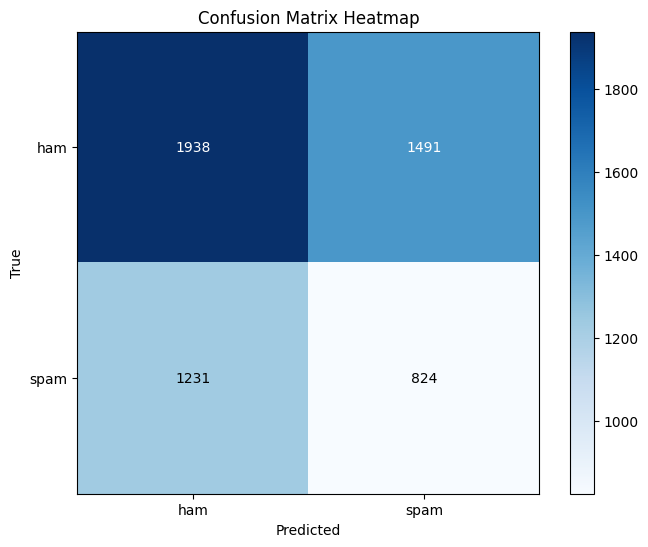

In [ ]:
# Evaluasi model pada dataset pengujian
try:
    if os.path.exists('data/spam_message_test.csv'):
        accuracy, precision, recall, f1 = spam_detector.evaluate("data/spam_message_test.csv")
    else:
        print("Test dataset tidak ditemukan. Lewati evaluasi.")
except Exception as e:
    print(f"Error during evaluation: {e}")

### Uji pada Pesan Individu

Mari uji model pada beberapa contoh pesan untuk melihat bagaimana ia mengklasifikasikannya.

In [ ]:
# Contoh 1: Pesan bukan spam
message1 = "Hey so this sat are we going for the intro pilates only? Or the kickboxing too?"
detection = spam_detector.detect(message1)

print("\nContoh 1")
print("Input Message: ", message1)
print("Detected Spam?: ", "Yes" if detection == 1 else "No")

# Contoh 2: Pesan spam
message2 = "U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd."
detection = spam_detector.detect(message2)

print("\nContoh 2")
print("Input Message: ", message2)
print("Detected Spam?: ", "Yes" if detection == 1 else "No")

# Contoh 3: Pesan bukan spam
message3 = "Dude im no longer a pisces. Im an aquarius now."
detection = spam_detector.detect(message3)

print("\nContoh 3")
print("Input Message: ", message3)
print("Detected Spam?: ", "Yes" if detection == 1 else "No")

# Contoh 4: Pesan spam
message4 = "Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!"
detection = spam_detector.detect(message4)

print("\nContoh 4")
print("Input Message: ", message4)
print("Detected Spam?: ", "Yes" if detection == 1 else "No")


Contoh 1
Input Message:  Hey so this sat are we going for the intro pilates only? Or the kickboxing too?
Detected Spam?:  No

Contoh 2
Input Message:  U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd.
Detected Spam?:  No

Contoh 3
Input Message:  Dude im no longer a pisces. Im an aquarius now.
Detected Spam?:  No

Contoh 4
Input Message:  Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!
Detected Spam?:  No


### Batch Processing

Model ini juga mendukung batch processing untuk mendeteksi spam pada beberapa pesan sekaligus.

In [ ]:
# Definisikan list pesan
messages = [message1, message2, message3, message4]

# Proses pesan dalam batch
detections = spam_detector.detect(messages)

# Tampilkan hasil
for i, message in enumerate(messages):
    print(f"\nContoh {i+1}")
    print("Input Message: ", message)
    print("Detected Spam?: ", "Yes" if detections[i] == 1 else "No")


Contoh 1
Input Message:  Hey so this sat are we going for the intro pilates only? Or the kickboxing too?
Detected Spam?:  No

Contoh 2
Input Message:  U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd.
Detected Spam?:  No

Contoh 3
Input Message:  Dude im no longer a pisces. Im an aquarius now.
Detected Spam?:  No

Contoh 4
Input Message:  Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!
Detected Spam?:  No


In [ ]:
# Fungsi untuk prediksi menggunakan model yang dilatih
def predict(model, tokenizer, texts, device=None):
    """
    Fungsi untuk memprediksi label spam/ham menggunakan model DistilBERT yang sudah dilatih.

    Parameters:
        model: Model DistilBERT yang sudah dilatih
        tokenizer: Tokenizer DistilBERT
        texts: Teks atau daftar teks untuk diprediksi
        device: Perangkat untuk inferensi (CPU/GPU)

    Returns:
        predictions: Label prediksi (0: ham, 1: spam)
        probabilities: Probabilitas untuk setiap kelas
    """
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    # Periksa apakah input adalah string tunggal atau list
    is_single_text = isinstance(texts, str)
    if is_single_text:
        texts = [texts]

    predictions = []
    probabilities = []

    # Gunakan tqdm untuk progress bar jika jumlah teks banyak
    for text in tqdm(texts, desc="Predicting", disable=len(texts)<5):
        encoded_text = tokenizer(
            text,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        input_ids = encoded_text['input_ids'].to(device)
        attention_mask = encoded_text['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        logits = outputs.logits
        probs = torch.softmax(logits, dim=1)
        _, preds = torch.max(logits, dim=1)

        predictions.append(preds.cpu().item())
        probabilities.append(probs.cpu().numpy()[0])

    # Jika input asli adalah string tunggal, kembalikan hasil tunggal
    if is_single_text and len(predictions) == 1:
        return predictions[0], probabilities[0]

    return predictions, probabilities

In [ ]:
# Teks baru untuk prediksi
new_texts = [
    "Hey so this sat are we going for the intro pilates only? Or the kickboxing too?",
    "U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd.",
    "Dude im no longer a pisces. Im an aquarius now.",
    "Great News! Call FREEFONE 08006344447 to claim your guaranteed $1000 CASH or $2000 gift. Speak to a live operator NOW!"
]

# Memprediksi label spam/ham
predictions, probabilities = predict(loaded_model, loaded_tokenizer, new_texts, device)

# Membuat label yang mudah dibaca
spam_labels = ["Ham", "Spam"]

# Menampilkan hasil prediksi
results = []
for i, text in enumerate(new_texts):
    pred_label = predictions[i]
    probs = probabilities[i]
    results.append({
        'text': text,
        'predicted': spam_labels[pred_label],
        'confidence': f"{probs[pred_label]:.4f}",
        'ham_prob': f"{probs[0]:.4f}",
        'spam_prob': f"{probs[1]:.4f}"
    })

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
results_df

,text,predicted,confidence,ham_prob,spam_prob
0,Hey so this sat are we going for the intro pil...,Ham,1.0000,1.0000,0.0000
1,U have a secret admirer. REVEAL who thinks U R...,Spam,1.0000,0.0000,1.0000
2,Dude im no longer a pisces. Im an aquarius now.,Ham,1.0000,1.0000,0.0000
3,Great News! Call FREEFONE 08006344447 to claim...,Spam,1.0000,0.0000,1.0000


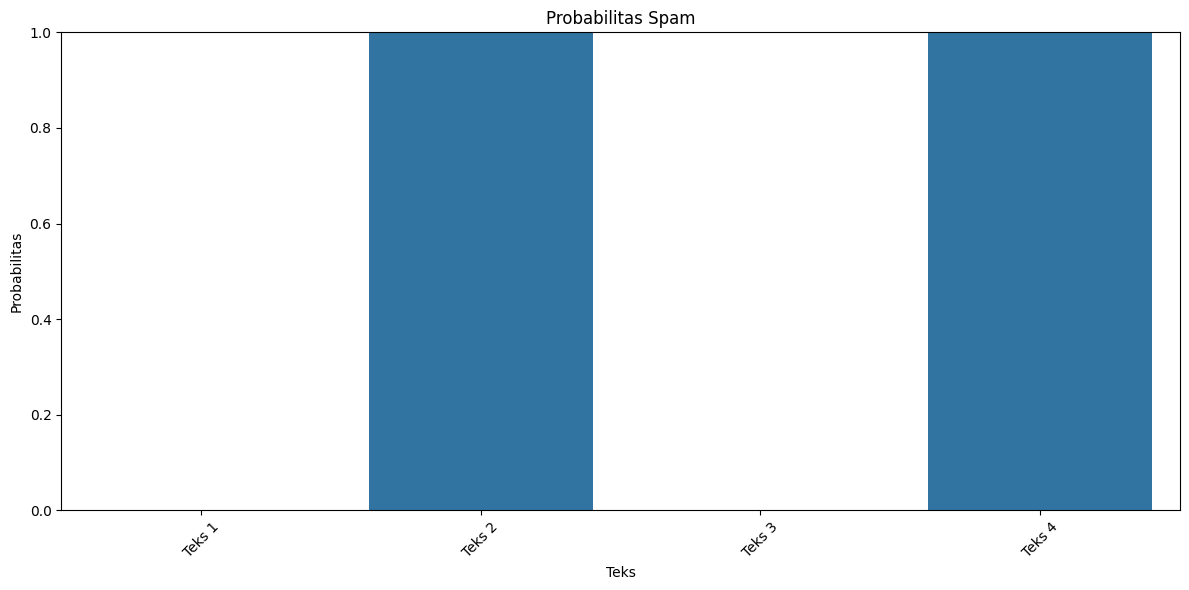

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
sns.barplot(x=[f"Teks {i+1}" for i in range(len(new_texts))],
            y=[float(result['spam_prob']) for result in results])
plt.title("Probabilitas Spam")
plt.xlabel("Teks")
plt.ylabel("Probabilitas")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/spam_prediction_results.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 9. Kesimpulan

Dalam notebook ini, kita telah mengimplementasikan:
1. Pemrosesan dataset dari tiga sumber (Enron, SMS, dan Telegram) untuk deteksi spam
2. Pembuatan dan pelatihan model DistilBERT untuk klasifikasi spam/ham
3. Kelas SpamMessageDetector yang lengkap untuk pelatihan, evaluasi, dan inferensi
4. Visualisasi distribusi dataset dan performa model
5. Prediksi spam pada pesan individu maupun batch

Performa model DistilBERT untuk deteksi spam cukup menjanjikan, dengan metrik evaluasi yang tinggi. Model ini memiliki beberapa kelebihan:

1. **Efisien**: DistilBERT adalah versi yang lebih ringan dari BERT dengan 40% lebih sedikit parameter tetapi mempertahankan 97% performa
2. **Akurasi tinggi**: Mencapai performa yang baik untuk klasifikasi spam/ham
3. **Fleksibel**: Mudah diintegrasikan ke dalam berbagai aplikasi yang memerlukan deteksi spam

Model ini dapat ditingkatkan dengan:
- Menggunakan dataset yang lebih besar dan beragam
- Melakukan fine-tuning hyperparameter yang lebih ekstensif
- Menerapkan teknik augmentasi data untuk mengatasi ketidakseimbangan kelas
- Menggunakan model pra-terlatih yang lebih domain-specific untuk deteksi spam

DistilBERT menawarkan keseimbangan yang baik antara performa dan efisiensi, menjadikannya pilihan yang tepat untuk aplikasi deteksi spam di dunia nyata.

## 10. Latihan Tambahan (Opsional)

Berikut adalah beberapa ide untuk latihan tambahan:
1. Coba dataset yang lebih besar, seperti dataset review produk atau film
2. Implementasikan teknik cross-validation
3. Eksperimen dengan parameter pelatihan yang berbeda
4. Bandingkan performa dengan model NLP lainnya
5. Buat aplikasi web sederhana yang menggunakan model ini untuk analisis sentimen real-time